<font size="5">

# Multi-Grid measurements at LET

<font size="3">
    
> __Author:__ Alexander Backis
<br/>__Institutes:__ University of Glasgow, European Spallation Source
<br/>__Dates:__ 2/10-2020 to 16/10-2020

_Abstract:_
This notebook contains the data-analysis tools used for the measurements at the LET instrument at ISIS. It describes how the analysis was performed, and summarizes the results.

# Contents
    
* [1. Introduction](#INTRODUCTION)
    * [1.1 Packages](#PACKAGES)
    * [1.2 Parameters](#PARAMETERS)
* [2. Data](#DATA)
    * [2.1 Paths](#PATHS)
    * [2.2 Extract](#EXTRACT)
    * [2.3 Load](#LOAD)
* [3. Filters](#FILTER)
* [4. Plotting](#PLOTTING)
    * [4.1. Multi-Grid detector](#PLOTMG)
    * [4.2. Helium-3 tubes](#PLOTHE3)
    * [4.3. Beam monitors](#PLOTBM)
* [5. Distance calibration](#CALIBRATION)
* [6. Analysis](#ANALYSIS)
    * [6.1. Lineshape](#LINESHAPE)
    * [6.2. Background](#BACKGROUND)
* [7. Conclusions](#CONCLUSIONS)

# 1. Introduction<a class="anchor" id="INTRODUCTION"></a>

Notebook showing the analysis of the LET measurements.

## 1.1 Packages<a class="anchor" id="PACKAGES"></a>

Import required packages.

In [ ]:
# Autoload packages when doing an external change
%load_ext autoreload
%autoreload 2

# Activate matplotlib in interactive notebook mode
%matplotlib notebook

# General packages
import os
import numpy as np
import pandas as pd

# Local packages
import file_handling.mg_manage as mg_manage
import file_handling.he3_read as he3_read
import file_handling.bm_read as bm_read

import plotting.mg_basic_plot as mg_basic_plot
import plotting.he3_basic_plot as he3_basic_plot
import plotting.bm_basic_plot as bm_basic_plot
import plotting.lineshape as lineshape

## 1.2 Parameters<a class="anchor" id="PARAMETERS"></a>

Define global parameters.

In [ ]:
# Instrument definition
MODERATOR_TO_SAMPLE_IN_M = 25

# Paths to folders containing data
nb_path = os.getcwd()
MG_RAW_FOLDER = nb_path + '/data/mg/raw/'
MG_PROCESSED_FOLDER = nb_path + '/data/mg/processed/'
HE3_FOLDER = nb_path + '/data/he3/'

# 2. Data<a class="anchor" id="DATA"></a>

## 2.1 Paths<a class="anchor" id="PATHS"></a>

In [ ]:
# Multi-Grid detector
MG_PATHS = {'mg_run_1': MG_RAW_FOLDER + 'ISIS_Source_FirstRun_mvmelst_241_201104_112406.zip',
            'mg_run_2': MG_RAW_FOLDER + 'ISIS_Source_2RUN_mvmelst_242_201104_115413.zip',
            'mg_run_3': MG_RAW_FOLDER + 'ISIS_Source_3RUN_mvmelst_243_201105_043444.zip',
            'mg_run_4': MG_RAW_FOLDER + 'BG_ISIS_mvmelst_244_201105_064156.zip',
            'mg_run_5': MG_RAW_FOLDER + 'BG_ISIS_OverNight_mvmelst_245_201105_103559.zip',
            'mg_run_6': MG_RAW_FOLDER + 'BG_AtLETTank_RUN0_mvmelst_246_201106_113335.zip',
            'mg_run_7': MG_RAW_FOLDER + 'BG_AtLETTank_RUN1_mvmelst_247_201106_122710.zip',
            'mg_run_8': MG_RAW_FOLDER + 'BG_AtLETTank_RUN2_mvmelst_248_201108_071904.zip',
            'mg_run_9': MG_RAW_FOLDER + 'BG_AtLETTank_RUN3_mvmelst_249_201109_044857.zip',
            'mg_run_10': MG_RAW_FOLDER + 'BG_AtLETTank_RUN4_mvmelst_250_201109_130726.zip'}

# Helium-3 tubes
HE3_PATHS = {'he3_run_1': HE3_FOLDER + 'LET00068153.nxs',
             'he3_run_2': HE3_FOLDER + 'LET00068806.nxs'}

## 2.2 Extract<a class="anchor" id="EXTRACT"></a>

In [ ]:
# Note that the 'extract_and_save'-function only needs to performed ONCE.
# After that, the data has been clustered and saved. The data can then
# be accessed using the 'load_clusters_and_events'-function.

mg_manage.extract_and_save('mg_run_1', MG_PATHS['mg_run_1'], MG_PROCESSED_FOLDER)
mg_manage.extract_and_save('mg_run_2', MG_PATHS['mg_run_2'], MG_PROCESSED_FOLDER)
mg_manage.extract_and_save('mg_run_3', MG_PATHS['mg_run_3'], MG_PROCESSED_FOLDER)
mg_manage.extract_and_save('mg_run_4', MG_PATHS['mg_run_4'], MG_PROCESSED_FOLDER)
mg_manage.extract_and_save('mg_run_5', MG_PATHS['mg_run_5'], MG_PROCESSED_FOLDER)
mg_manage.extract_and_save('mg_run_6', MG_PATHS['mg_run_6'], MG_PROCESSED_FOLDER)
mg_manage.extract_and_save('mg_run_7', MG_PATHS['mg_run_7'], MG_PROCESSED_FOLDER)
mg_manage.extract_and_save('mg_run_8', MG_PATHS['mg_run_8'], MG_PROCESSED_FOLDER)
mg_manage.extract_and_save('mg_run_9', MG_PATHS['mg_run_9'], MG_PROCESSED_FOLDER)
mg_manage.extract_and_save('mg_run_10', MG_PATHS['mg_run_10'], MG_PROCESSED_FOLDER)

## 2.3 Load<a class="anchor" id="LOAD"></a>

In [ ]:
# Multi-Grid detector
mg_clu_run_1, mg_ev_run_1 = mg_manage.load_clusters_and_events('mg_run_1', MG_PROCESSED_FOLDER)
mg_clu_run_2, mg_ev_run_2 = mg_manage.load_clusters_and_events('mg_run_2', MG_PROCESSED_FOLDER)
mg_clu_run_3, mg_ev_run_3 = mg_manage.load_clusters_and_events('mg_run_3', MG_PROCESSED_FOLDER)
mg_clu_run_4, mg_ev_run_4 = mg_manage.load_clusters_and_events('mg_run_4', MG_PROCESSED_FOLDER)
mg_clu_run_5, mg_ev_run_5 = mg_manage.load_clusters_and_events('mg_run_5', MG_PROCESSED_FOLDER)
mg_clu_run_6, mg_ev_run_6 = mg_manage.load_clusters_and_events('mg_run_6', MG_PROCESSED_FOLDER)
mg_clu_run_7, mg_ev_run_7 = mg_manage.load_clusters_and_events('mg_run_7', MG_PROCESSED_FOLDER)
mg_clu_run_8, mg_ev_run_8 = mg_manage.load_clusters_and_events('mg_run_8', MG_PROCESSED_FOLDER)
mg_clu_run_9, mg_ev_run_9 = mg_manage.load_clusters_and_events('mg_run_9', MG_PROCESSED_FOLDER)
mg_clu_run_10, mg_ev_run_10 = mg_manage.load_clusters_and_events('mg_run_10', MG_PROCESSED_FOLDER)

# Helium-3 tubes
he3_mapping_1 = he3_read.get_pixel_to_xyz_mapping(HE3_PATHS['he3_run_1'])
df_he3_run_1 = he3_read.import_data(HE3_PATHS['he3_run_1'])
he3_mapping_2 = he3_read.get_pixel_to_xyz_mapping(HE3_PATHS['he3_run_2'])
df_he3_run_2 = he3_read.import_data(HE3_PATHS['he3_run_2'])

# Beam monitors
bm_he3_run_1 = bm_read.import_data(HE3_PATHS['he3_run_1'])
bm_he3_run_2 = bm_read.import_data(HE3_PATHS['he3_run_2'])

# 3. Filters<a class="anchor" id="FILTER"></a>

Declare data filters which can be used on the data. Below are a few template filters.

In [ ]:
# Multi-Grid

## Declare filter
mg_filter = {'wm': [1, 1, True],                   # Wire multiplicity
             'gm': [1, 5, True],                   # Grid multiplicity
             'wadc': [800, np.inf, True],          # Wire charge
             'gadc': [800, np.inf, True],          # Grid charge
             'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
             'time': [0, np.inf, True],            # Time (TDC channels)
             'bus': [0, 8, True],                  # Bus
             'flag': [0, 1, False],                # =1 if different buses within same coincidence
             'layer': [0, 19, False],              # Layer, front=0 to back=19
             'row': [0, 11, False],                # Row, right to left (seen from neutrons)
             'gch': [81, 118, True]}               # Grid channel, bottom=80 to top=119

# Helium-3 tube array

## Define region of interest (should be a Multi-Grid sized region at the correct angle)
pixels = []
start_pixel = 38400+1 # As the Multi-Grid detector is elevated a few centimeters from the ground
height = 58
diff_tubes = 256
number_tubes = 32
number_rows = 4
for i in np.arange(0, number_rows, 1):
    start = start_pixel+diff_tubes*i
    stop = start_pixel+diff_tubes*i + height
    for j in np.arange(start, stop):
        pixels.append(j)
region_of_interest = np.array(pixels)

## Define region edges of region of interest
region_edges = np.zeros(5, dtype='int')
region_edges[0] = region_of_interest[0]
region_edges[1] = region_of_interest[height-1]
region_edges[2] = region_of_interest[number_rows*height-1]
region_edges[3] = region_of_interest[number_rows*height-height]
region_edges[4] = region_of_interest[0]

# 4. Plotting<a class="anchor" id="PLOTTING"></a>

## 4.1 Multi-Grid detector<a class="anchor" id="PLOTMG"></a>

Declare parameters

In [ ]:
mg_area = 0.0225*0.0225*4*38 # m^2
bus = 0

Plot data

In [ ]:
mg_basic_plot.mg_plot_basic_bus('run_1', bus, mg_clu_run_1, mg_ev_run_1, mg_filter, mg_area,
                                'ISIS_Source_FirstRun_mvmelst_241_201104_112406.zip')

In [ ]:
mg_basic_plot.mg_plot_basic_bus('run_2', bus, mg_clu_run_2, mg_ev_run_2, mg_filter, mg_area,
                                'ISIS_Source_2RUN_mvmelst_242_201104_115413.zip')

In [ ]:
mg_basic_plot.mg_plot_basic_bus('run_3', bus, mg_clu_run_3, mg_ev_run_3, mg_filter, mg_area,
                                'ISIS_Source_3RUN_mvmelst_243_201105_043444.zip')

In [ ]:
mg_basic_plot.mg_plot_basic_bus('run_4', bus, mg_clu_run_4, mg_ev_run_4, mg_filter, mg_area,
                                'BG_ISIS_mvmelst_244_201105_064156.zip')

In [ ]:
mg_basic_plot.mg_plot_basic_bus('run_5', bus, mg_clu_run_5, mg_ev_run_5, mg_filter, mg_area,
                                'BG_ISIS_OverNight_mvmelst_245_201105_103559.zip')

In [ ]:
mg_basic_plot.mg_plot_basic_bus('run_6', bus, mg_clu_run_6, mg_ev_run_6, mg_filter, mg_area,
                                'BG_AtLETTank_RUN0_mvmelst_246_201106_113335.zip')

In [ ]:
mg_basic_plot.mg_plot_basic_bus('run_7', bus, mg_clu_run_7, mg_ev_run_7, mg_filter, mg_area,
                                'BG_AtLETTank_RUN1_mvmelst_247_201106_122710.zip')

In [ ]:
mg_basic_plot.mg_plot_basic_bus('run_8', bus, mg_clu_run_8, mg_ev_run_8, mg_filter, mg_area,
                                'BG_AtLETTank_RUN2_mvmelst_248_201108_071904.zip')

In [ ]:
mg_basic_plot.mg_plot_basic_bus('run_9', bus, mg_clu_run_9, mg_ev_run_9, mg_filter, mg_area,
                                'BG_AtLETTank_RUN3_mvmelst_249_201109_044857.zip')

In [ ]:
mg_basic_plot.mg_plot_basic_bus('run_10', bus, mg_clu_run_10, mg_ev_run_10, mg_filter, mg_area,
                                'BG_AtLETTank_RUN4_mvmelst_250_201109_130726.zip')

## 4.2 Helium-3 tubes<a class="anchor" id="PLOTHE3"></a>

Select region of interest

In [ ]:
he3_basic_plot.he3_plot_3D_histogram(df_he3_run_1, he3_mapping_1, region_edges=region_edges)
he3_basic_plot.he3_plot_coordinates(he3_mapping_1, region=region_of_interest)

Declare parameters

In [ ]:
tof_bins = 500
energy_bins = 500

Plot data

In [ ]:
he3_basic_plot.plot_tof(df_he3_run_1, tof_bins, region_of_interest, 'LET00068153')
he3_basic_plot.plot_energy(df_he3_run_1, energy_bins, he3_mapping_1, region_of_interest,
                           MODERATOR_TO_SAMPLE_IN_M, 'LET00068153')

In [ ]:
he3_basic_plot.plot_tof(df_he3_run_2, tof_bins, region_of_interest, 'LET00068806')
he3_basic_plot.plot_energy(df_he3_run_2, energy_bins, he3_mapping_2, region_of_interest,
                           MODERATOR_TO_SAMPLE_IN_M, 'LET00068806')

## 4.3 Beam monitorss<a class="anchor" id="PLOTBM"></a>

Declare parameters

In [ ]:
bm_bins = 500

Plot data

In [ ]:
bm_basic_plot.bm_plot_basic(bm_he3_run_1, bm_bins, 'LET00068153')

In [ ]:
bm_basic_plot.bm_plot_basic(bm_he3_run_2, bm_bins, 'LET00068806')

# 5. Distance calibration<a class="anchor" id="CALIBRATION"></a>

[Awaiting data from calibration measurement]

# 6. Analysis<a class="anchor" id="ANALYSIS"></a>

## 6.1. Lineshape<a class="anchor" id="LINESHAPE"></a>

### Helium-3 tubes

Declare parameters

In [ ]:
dE_bins = 500

In [ ]:
no_region_of_interest = df_he3_run_1['pixel_id'].unique()
lineshape.plot_figure_of_merits(df_he3_run_1, dE_bins, he3_mapping_1, no_region_of_interest,
                                MODERATOR_TO_SAMPLE_IN_M, 'LET00068153', prominence=1e4)

## 6.2. Background<a class="anchor" id="BACKGROUND"></a>

### Multi-Grid detector

For background analysis, the focus will be on the longest runs conducted, which were in the LET tank. Two long runs were conducted over the weekend, 40h+20h. These two data sets will be appendend and then analyzed. The filters will be applied one after the other, and the effect on background rate will be investigated.

For the background study, three numbers are required: active detector area, measurement duration, and total number of neutron events registered. Here, the active area is defined as the area covered by the surface voxels on the front of the detector, as shown in Fig. 1 below. The measurement duration is defined as the time from the first neutron event registered in the detector to the last event registered, while the total number of neutron events is the sum of events which pass a filter. The filter is designed to remove as many false events as possible, such as gammas and electronic noises, while keeping the highest possible number of real neutron events.

<table><tr><td><img src=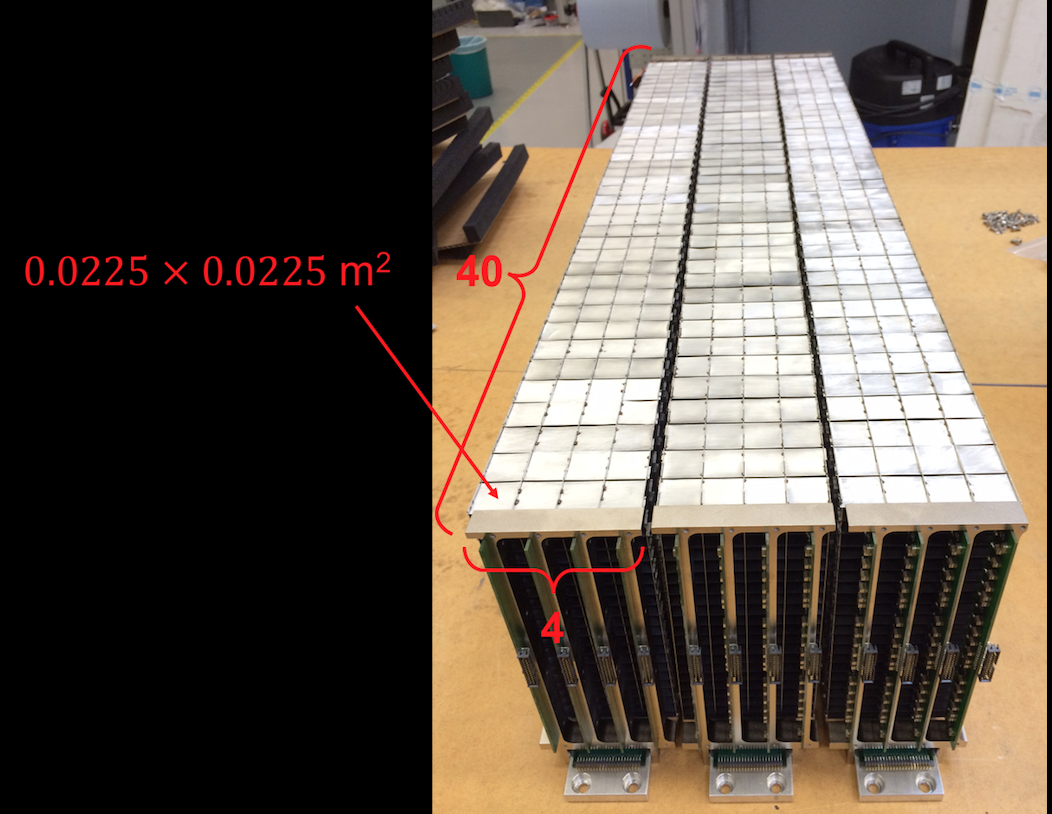
 height="400" width="500"><figcaption>Figure 1. Surface area calculation of the Multi-Grid detector.</figcaption></td></tr></table>



#### Appending of data

First, the data is appended. As the time-stamp is reset at the begining of each measurement, the value of the last time-stamp from the first measurement is added to the time-stamps of the second measurement.

In [ ]:
clu_full = mg_manage.merge_files([mg_clu_run_7, mg_clu_run_8])
ev_full = mg_manage.merge_files([mg_ev_run_7, mg_ev_run_8])

#### Data without filters

As a first step, the background data is studied without any filters.

In [ ]:
mg_filter = {'wm': [1, 1, False],                  # Wire multiplicity
             'gm': [1, 5, False],                  # Grid multiplicity
             'wadc': [600, np.inf, False],         # Wire charge
             'gadc': [600, np.inf, False],         # Grid charge
             'tof': [0, np.inf, False],            # Time-of-flight (TDC channels)
             'time': [0, np.inf, False],           # Time (TDC channels)
             'bus': [0, 8, False],                 # Bus
             'flag': [0, 1, False],                # =1 if different buses within same coincidence
             'layer': [0, 19, False],              # Layer, front=0 to back=19
             'row': [0, 11, False],                # Row, right to left (seen from neutrons)
             'gch': [80, 119, False]}              # Grid channel, bottom=80 to top=119     
area = 0.0225*0.0225*4*40
bus = 0
mg_basic_plot.mg_plot_basic_bus('run_7_and_8', bus, clu_full, ev_full, mg_filter, area)

Looking at the plots, there are a few feautures that are noticed:
- **PHS vs Channel**: A few wires, such as ~channel 30, are much more active than the average, and the same is true of the top and bottom grid (80 and 119), especially the top. In addition to this, there seems to be a few hot spots over the grid column, such as that around channel 100, where the counts are locally higher. This is most obvious at the lower PHS values.
- **Even multiplicity**: A high percentage of wires firing without a grid in coincidence (20% of all registered clusters).
- **Charge coincidences**: There is a second straight line, with less statistics, with a lower inclination (about 1/4 the inclination of the main line) with respect to the grid charge.
- **Coincidences**: There is a large hot spot for a few wires at the top grid.
- **Rate vs time**: The rate drops over the first ten hours and is then stabilized.

#### Removing top and bottom grid...

It is known from previous measurements that the excessive counts in the top and bottom grid is due to activity in the soldering material on the PCBs. The emissions from the soldering will be blocked in the final detector, removing these false events. Therefore, to get a more fair comparison to the rate that will be found in the final detector, data from these grids are removed and the area calculation is adjusted accordingly. Note that the 'PHS vs channel'-plot is not affected by the filters, as the data diplayed in that plot is from the raw events, not the clusters.

In [ ]:
mg_filter = {'wm': [1, 1, False],                  # Wire multiplicity
             'gm': [1, 5, False],                  # Grid multiplicity
             'wadc': [600, np.inf, False],         # Wire charge
             'gadc': [600, np.inf, False],         # Grid charge
             'tof': [0, np.inf, False],            # Time-of-flight (TDC channels)
             'time': [0, np.inf, False],           # Time (TDC channels)
             'bus': [0, 8, False],                 # Bus
             'flag': [0, 1, False],                # =1 if different buses within same coincidence
             'layer': [0, 19, False],              # Layer, front=0 to back=19
             'row': [0, 11, False],                # Row, right to left (seen from neutrons)
             'gch': [81, 118, True]}              # Grid channel, bottom=80 to top=119     
area = 0.0225*0.0225*4*38
bus = 0
mg_basic_plot.mg_plot_basic_bus('run_7_and_8', bus, clu_full, ev_full, mg_filter, area)

By removing the top and bottom grid, many of the spurious features first observed in data are removed: (1) there are no more wire events without a grid in coincidence, (2) the additional line the charge coincidences was removed (perhaps this was due to the fact that this was the top/bottom grid, and on average half of the emitted alphas and Li ions would be emitted in a direction out of the top/bottom of the detector?), (3) the time-dependence in the rate vs time plot was removed. Note that the color scale on the plots have change between different runs of plots to accomodoate the change in statistics.

A few observations of the new plots are made:
- **PHS**: Strong reduction in low energy events, the spectra now have clear plataues both for the wires and the grids.
- **Even multiplicity**: Approximately 2% of the remaining clusters are events with 2 wires in coincidence.
- **Coincidences and Uniformity**: There are a few hotspots, most notably every 20 wire channel (corresponding to the front of the detector) and a few regions of grids (~90, 100 and 115).

### ...while also removing high multiplicity events...

Another type of events we want to remove are those with more than 1 wire in coincidence (should be suppressed as the wires are physcially separated by the blades), as well as events with high a number of grids in coincidence (the upper limit is limited by the maximum path length of the alpha particles). Here, we select this limit as between 1 and 5 grids in coincidence, and only 1 wire in coincidence.

As seen from the previous series of plots, these events only constitute about 2% of all clusters after the top/bottom grids were removed. However, it is still important that they are removed.

In [ ]:
mg_filter = {'wm': [1, 1, True],                  # Wire multiplicity
             'gm': [1, 5, True],                  # Grid multiplicity
             'wadc': [600, np.inf, False],         # Wire charge
             'gadc': [600, np.inf, False],         # Grid charge
             'tof': [0, np.inf, False],            # Time-of-flight (TDC channels)
             'time': [0, np.inf, False],           # Time (TDC channels)
             'bus': [0, 8, False],                 # Bus
             'flag': [0, 1, False],                # =1 if different buses within same coincidence
             'layer': [0, 19, False],              # Layer, front=0 to back=19
             'row': [0, 11, False],                # Row, right to left (seen from neutrons)
             'gch': [81, 118, True]}              # Grid channel, bottom=80 to top=119     
area = 0.0225*0.0225*4*38
bus = 0
mg_basic_plot.mg_plot_basic_bus('run_7_and_8', bus, clu_full, ev_full, mg_filter, area)

By adding the multiplicity filter, no appearant changes are seen in the plots, except a removal of higher multiplicity events and a lowering of the rate by approximately 0.03 Hz/m^2.

#### ...as well as low ADC events.

The next type of events removed are low ADC events. Although true neutron events are also present in this region, there is an over-representation of gamma and electronic noises with low ADC values. Therefore, in the interest of achiveing the highest possible signal-to-noise ratio, these events are cut. Looking at the PHS, the threshold is put just at the base of the intial peak, at the start of the plateau. This is seen in figure 2 below, where a few possible thresholds (from left to right, 600, 800 and 1000 ADC channels) are displayed as black vertical lines. By visual inspection, 800 ADC channels appears to be an appropriate choice.

<table><tr><td><img src=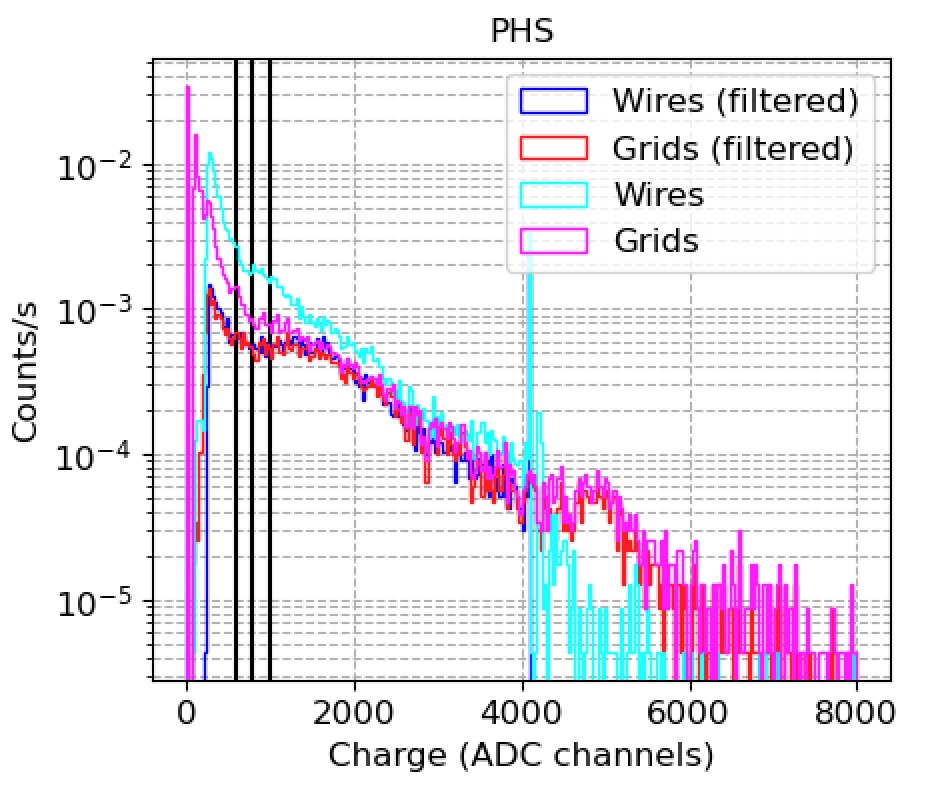
 height="400" width="500"><figcaption>Figure 2. Decision on threshold for the data. Starting from left to right, the vertical black lines are at 600, 800 and 1000 ADC channels.</figcaption></td></tr></table>

In [ ]:
mg_filter = {'wm': [1, 1, True],                  # Wire multiplicity
             'gm': [1, 5, True],                  # Grid multiplicity
             'wadc': [800, np.inf, True],         # Wire charge
             'gadc': [800, np.inf, True],         # Grid charge
             'tof': [0, np.inf, False],            # Time-of-flight (TDC channels)
             'time': [0, np.inf, False],           # Time (TDC channels)
             'bus': [0, 8, False],                 # Bus
             'flag': [0, 1, False],                # =1 if different buses within same coincidence
             'layer': [0, 19, False],              # Layer, front=0 to back=19
             'row': [0, 11, False],                # Row, right to left (seen from neutrons)
             'gch': [81, 118, True]}              # Grid channel, bottom=80 to top=119   
area = 0.0225*0.0225*4*38
bus = 0
mg_basic_plot.mg_plot_basic_bus('run_7_and_8', bus, clu_full, ev_full, mg_filter, area)

By applying the ADC threshold, the rate was reduced by approximately 0.23 Hz/m^2. However, as seen in the coincidences and uniformity plots, there are still regions were the grids and wires have an elevated count rate. Therefore, the next step would be to investigate the events in these regions.

#### Investigation of high rate grids

Data is selected only from the high rate grids and investigated. The comparison is made between grid 115 (which have the highest excessive counts), a few grids with excessive counts (88, 89, 97, 100, 112, 113, 114) and a low rate grid (channel 93). Each block below is for one of these filters, in the same order as they were mentioned here. The remaining plots are then examined to see if there are any differences between the high count grids and low counts grids, for example in PHS or multiplicity.

In [ ]:
# Basic filter
mg_filter = {'wm': [1, 1, True],                  # Wire multiplicity
             'gm': [1, 5, True],                  # Grid multiplicity
             'wadc': [800, np.inf, True],         # Wire charge
             'gadc': [800, np.inf, True],         # Grid charge
             'tof': [0, np.inf, False],            # Time-of-flight (TDC channels)
             'time': [0, np.inf, False],           # Time (TDC channels)
             'bus': [0, 8, False],                 # Bus
             'flag': [0, 1, False],                # =1 if different buses within same coincidence
             'layer': [0, 19, False],              # Layer, front=0 to back=19
             'row': [0, 11, False],                # Row, right to left (seen from neutrons)
             'gch': [81, 118, True]}              # Grid channel, bottom=80 to top=119     
# Extra filter removing everything except the grids of choice
clu_temp = clu_full[clu_full.gch == 115]
area = 0.0225*0.0225*4*1
bus = 0
mg_basic_plot.mg_plot_basic_bus('run_7_and_8', bus, clu_temp, ev_full, mg_filter, area)

In [ ]:
# Basic filter
mg_filter = {'wm': [1, 1, True],                  # Wire multiplicity
             'gm': [1, 5, True],                  # Grid multiplicity
             'wadc': [800, np.inf, True],         # Wire charge
             'gadc': [800, np.inf, True],         # Grid charge
             'tof': [0, np.inf, False],            # Time-of-flight (TDC channels)
             'time': [0, np.inf, False],           # Time (TDC channels)
             'bus': [0, 8, False],                 # Bus
             'flag': [0, 1, False],                # =1 if different buses within same coincidence
             'layer': [0, 19, False],              # Layer, front=0 to back=19
             'row': [0, 11, False],                # Row, right to left (seen from neutrons)
             'gch': [81, 118, True]}              # Grid channel, bottom=80 to top=119     
# Extra filter removing everything except the grids of choice, 88, 89, 97, 100, 112, 113, 114
clu_temp = clu_full[(clu_full.gch == 88) |
                    (clu_full.gch == 89) |
                    (clu_full.gch == 97) |
                    (clu_full.gch == 100) |
                    (clu_full.gch == 112) |
                    (clu_full.gch == 113) |
                    (clu_full.gch == 114)]
area = 0.0225*0.0225*4*7
bus = 0
mg_basic_plot.mg_plot_basic_bus('run_7_and_8', bus, clu_temp, ev_full, mg_filter, area)

In [ ]:
# Basic filter
mg_filter = {'wm': [1, 1, True],                  # Wire multiplicity
             'gm': [1, 5, True],                  # Grid multiplicity
             'wadc': [800, np.inf, True],         # Wire charge
             'gadc': [800, np.inf, True],         # Grid charge
             'tof': [0, np.inf, False],            # Time-of-flight (TDC channels)
             'time': [0, np.inf, False],           # Time (TDC channels)
             'bus': [0, 8, False],                 # Bus
             'flag': [0, 1, False],                # =1 if different buses within same coincidence
             'layer': [0, 19, False],              # Layer, front=0 to back=19
             'row': [0, 11, False],                # Row, right to left (seen from neutrons)
             'gch': [81, 118, True]}              # Grid channel, bottom=80 to top=119     
# Extra filter removing everything except the grids of choice
clu_temp = clu_full[clu_full.gch == 93]
area = 0.0225*0.0225*4*1
bus = 0
mg_basic_plot.mg_plot_basic_bus('run_7_and_8', bus, clu_temp, ev_full, mg_filter, area)

Unfortuntely, there was no clear signature found which separates the high count grids from the low count grids in terms of ADC or multiplicity.

#### Investigation of high rate wires

Next, the same analysis that was done for the grids are conducted for the high rate wires, i.e. channels 0, 20, 40 and 60. Note that in this analysis, the count rate cannot be direcly compared, as the depth has changed from 20 to 1 wire. The rate can be approximately compared by scaling the observed rate by a factor 20, which would account for the depth difference.

In [ ]:
# Basic filter
mg_filter = {'wm': [1, 1, True],                  # Wire multiplicity
             'gm': [1, 5, True],                  # Grid multiplicity
             'wadc': [800, np.inf, True],         # Wire charge
             'gadc': [800, np.inf, True],         # Grid charge
             'tof': [0, np.inf, False],            # Time-of-flight (TDC channels)
             'time': [0, np.inf, False],           # Time (TDC channels)
             'bus': [0, 8, False],                 # Bus
             'flag': [0, 1, False],                # =1 if different buses within same coincidence
             'layer': [0, 19, False],              # Layer, front=0 to back=19
             'row': [0, 11, False],                # Row, right to left (seen from neutrons)
             'gch': [81, 118, True]}              # Grid channel, bottom=80 to top=119     
# Extra filter removing everything except the wires of choice
clu_temp = clu_full[(clu_full.wch == 0) |
                    (clu_full.wch == 20) |
                    (clu_full.wch == 40) |
                    (clu_full.wch == 60)]
area = 0.0225*0.0225*4*38
bus = 0
mg_basic_plot.mg_plot_basic_bus('run_7_and_8', bus, clu_temp, ev_full, mg_filter, area)

As in the case for the grids, no clear signature is seen for the wires. However, the middle grid is suspicously active, as seen in the grid uniformity plot.

#### Removal of regions with high rates

To investigate what the rate in the detector would be in a scenario without the noisy regions, these regions are removed and the rate is calculated. Here, the first wire row is removed (channels, 0, 20, 40 and 60) along with grid 115.

In [ ]:
# Basic filter
mg_filter = {'wm': [1, 1, True],                  # Wire multiplicity
             'gm': [1, 5, True],                  # Grid multiplicity
             'wadc': [800, np.inf, True],         # Wire charge
             'gadc': [800, np.inf, True],         # Grid charge
             'tof': [0, np.inf, False],            # Time-of-flight (TDC channels)
             'time': [0, np.inf, False],           # Time (TDC channels)
             'bus': [0, 8, False],                 # Bus
             'flag': [0, 1, False],                # =1 if different buses within same coincidence
             'layer': [0, 19, False],              # Layer, front=0 to back=19
             'row': [0, 11, False],                # Row, right to left (seen from neutrons)
             'gch': [81, 118, True]}              # Grid channel, bottom=80 to top=119     
# Extra filter removing everything except the grids and wires of choice
clu_temp = clu_full[(clu_full.gch != 115) &
                    (clu_full.wch != 0) &
                    (clu_full.wch != 20) &
                    (clu_full.wch != 40) &
                    (clu_full.wch != 60)]

area = 0.0225*0.0225*4*37
bus = 0
mg_basic_plot.mg_plot_basic_bus('run_7_and_8', bus, clu_temp, ev_full, mg_filter, area)

By removing these regions, the rate is reduced to the acceptable level of 0.4 Hz/m^2, which for a 16 layer detector would approximately be 0.4 * (16/19) = 0.34 Hz/m^2. Note that there appears to be a small gradient on wires from front to back, which would indicate neutrons entering from the front. Therefore, the true intrinsic background would most likely be lower than the one recorded here.

# 7. Conclusions<a class="anchor" id="CONCLUSIONS"></a>

[TO BE WRITTEN]